In [1]:
import pandas as pd
import numpy as np

In [2]:
# 数据加载
df=pd.read_csv("./voice.csv")
print(df.isnull().sum())
print(df.shape)

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64
(3168, 21)


In [4]:
print('样本个数:{}'.format(df.shape[0]))
print('男性个数:{}'.format(df[df.label=='male'].shape[0]))
print('女性个数:{}'.format(df[df.label=='female'].shape[0]))

样本个数:3168
男性个数:1584
女性个数:1584


In [5]:
# 分离特征值与label
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
#使用标签编码
from sklearn.preprocessing import LabelEncoder,StandardScaler
gender_encoder=LabelEncoder()
y=gender_encoder.fit_transform(y)
print(y)

[1 1 1 ... 0 0 0]


In [7]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
#print('SVM 预测结果:',y_pred)
print('SVM 预测准确率:',accuracy_score(y_test,y_pred))

SVM 预测准确率: 0.9794952681388013


In [11]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
#print('SVM 预测结果:',y_pred)
print('SVM 预测准确率:',accuracy_score(y_test,y_pred))

SVM 预测准确率: 0.9716088328075709


In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)
print('LR 预测准确率:',accuracy_score(y_test,y_pred))

LR 预测准确率: 0.9794952681388013


In [17]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Decision Tree 预测准确率:',accuracy_score(y_test,y_pred))

Decision Tree 预测准确率: 0.9589905362776026


In [19]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('KNN 预测准确率:',accuracy_score(y_test,y_pred))

KNN 预测准确率: 0.973186119873817


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


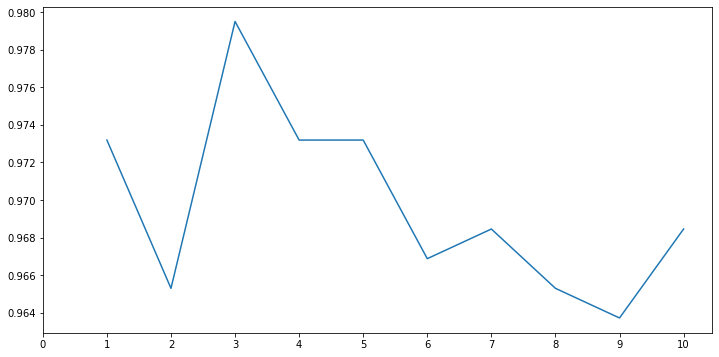

Accuracies for different values of n are: [0.97318612 0.96529968 0.97949527 0.97318612 0.97318612 0.96687697
 0.96845426 0.96529968 0.9637224  0.96845426] with the max value as  0.9794952681388013


In [24]:
import matplotlib.pyplot as plt

a_index=list(range(1,11))
a=pd.Series()
x=[i for i in np.arange(11)]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    a=a.append(pd.Series(accuracy_score(y_test,pred)))
plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [27]:
from sklearn.ensemble import RandomForestClassifier #Random Forest
model=RandomForestClassifier()
model.fit(x_train,y_train)
predict=model.predict(x_test)
print('RF 预测准确率:',accuracy_score(y_test,y_pred))

RF 预测准确率: 0.973186119873817


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=10)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('gbdt 预测准确率:',accuracy_score(y_test,y_pred))

gbdt 预测准确率: 0.973186119873817


In [39]:
import  xgboost as xgb 
dtrain = xgb.DMatrix(x_train, label = y_train)
dtest = xgb.DMatrix(x_test, label = y_test)
param = {'max_depth':2, 'eta':1, 'silent':0, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
train_preds = bst.predict(dtest)
train_predictions = [round(value) for value in train_preds] #进行四舍五入的操作--变成0.1(算是设定阈值的符号函数)
train_accuracy = accuracy_score(y_test, train_predictions) #使用sklearn进行比较正确率
print ("Train Accuary: %.2f%%" % (train_accuracy * 100.0))

[18:09:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train Accuary: 95.74%


In [49]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn import svm
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


,CV Mean,Std
Linear Svm,0.960856,0.030171
Radial Svm,0.959899,0.029061
Logistic Regression,0.958644,0.031219
KNN,0.936220,0.043712
Decision Tree,0.942546,0.037127
Random Forest,0.960219,0.023978


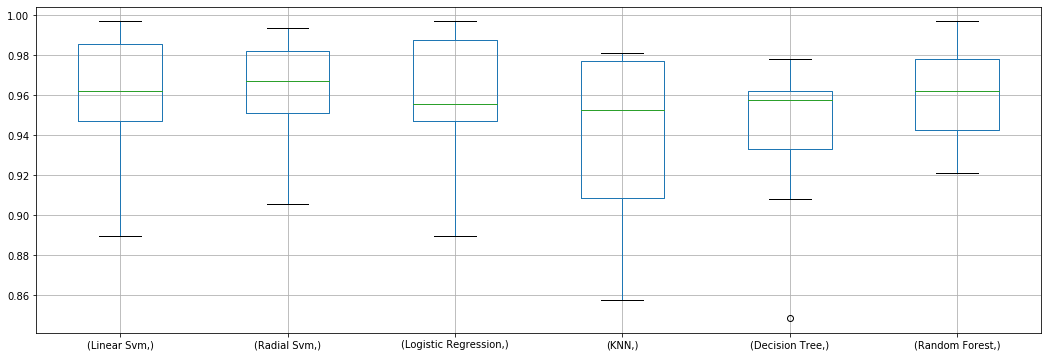

In [52]:
plt.subplots(figsize=(18,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

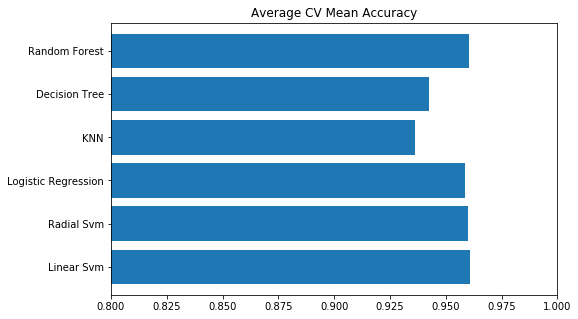

In [53]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
plt.xlim(0.8,1.0)
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9684417998514908
SVC(C=0.1, gamma=0.1, kernel='linear')


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  2.3min finished


## 结论及经验
+ 1、涉及分类问题，可以参考的模型有线性回归及其非线性扩展、决策树、神经网络、支持向量机SVM、规则学习等
+ 2、模型如何训练和优化
  + 如果要评估训练集和验证集的划分效果，常用的有留出法、交叉验证法、自助法、模型调参
  + 如果模型计算时间太长，可以考虑剪枝 
  + 如果是过拟合，则可通过引入正则化项来抑制（补偿原理）
  + 如果单个模型效果不佳，可以集成多个学习器通过一定策略结合，取长补短（集成学习）
+ 3、模型选择：
  + 奥卡姆剃刀原理  模型选择时优先选择简单模型 可以通过减小模型的复杂度来降低过拟合的风险